<img src="../logo.png" alt="University of Illinois" style="width: 200px;"/>

##  Financial Investments ##
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2019 University of Illinois Board of Trustees. All Rights Reserved.
Licensed under the MIT license

### imports ###

In [1]:
import numpy
import pandas
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter as StrMethodFormatter
idx=pandas.IndexSlice

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")
    

sim_color="red"
N_samples=1000

In [2]:
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

In [3]:
MARKET="SPY"
ASSET="AAPL"
Treasury=.02
riskfree=Treasury/252

In [4]:
def getdata(ticker):
    data=pandas.read_csv(ticker+".csv",index_col=0)
    data.index = pandas.to_datetime(data.index)
    S=pandas.Series(data["Adj Close"],name=ticker)
    return S.copy()

market=getdata(MARKET)
asset=getdata(ASSET)

print(market.head())
print(asset.head())

Date
2018-11-05    268.063110
2018-11-06    269.759399
2018-11-07    275.534637
2018-11-08    275.034546
2018-11-09    272.347961
Name: SPY, dtype: float64
Date
2018-11-05    198.509583
2018-11-06    200.656265
2018-11-07    206.741821
2018-11-08    206.020493
2018-11-09    202.048096
Name: AAPL, dtype: float64


In [5]:
data_raw=pandas.concat([market,asset],axis="columns",join="inner")
data_raw.head()

,SPY,AAPL
Date,,
2018-01-02,261.332214,168.339050
2018-01-03,262.985138,168.309738
2018-01-04,264.093597,169.091522
2018-01-05,265.853516,171.016678
2018-01-08,266.339691,170.381485


In [6]:
prices=data_raw.copy()
prices.head()

,SPY,AAPL
Date,,
2018-01-02,261.332214,168.339050
2018-01-03,262.985138,168.309738
2018-01-04,264.093597,169.091522
2018-01-05,265.853516,171.016678
2018-01-08,266.339691,170.381485


C:\Users\richa\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


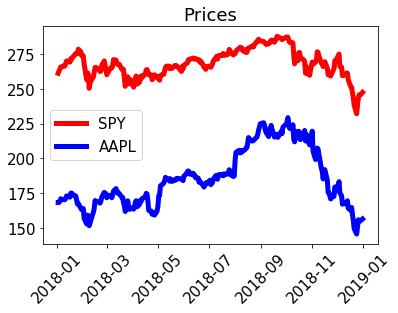

In [7]:
plt.figure()
plt.plot(prices.index,prices["SPY"].values,label=MARKET,color="red")
plt.plot(prices.index,prices["AAPL"].values,label=ASSET,color="blue")
plt.legend()
plt.title("Prices")
plt.xticks(rotation=45)
saver("prices")
plt.show()
plt.close()

In [8]:
returns=prices/prices.shift()-1
returns_ra=returns-riskfree
returns_ra=returns_ra.dropna(axis="index")
returns_ra.head()

,SPY,AAPL
Date,,
2018-01-03,0.006246,-0.000253
2018-01-04,0.004136,0.004566
2018-01-05,0.006585,0.011306
2018-01-08,0.001749,-0.003794
2018-01-09,0.002184,-0.000194


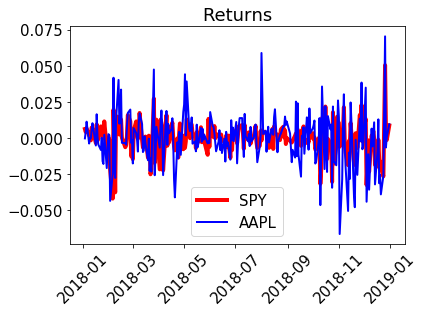

In [9]:
plt.figure()
plt.plot(returns.index,returns["SPY"].values,label=MARKET,color="red",linewidth=4)
plt.plot(returns.index,returns["AAPL"].values,label=ASSET,color="blue",linewidth=2)
plt.legend()
plt.title("Returns")
plt.xticks(rotation=45)
saver("returns")
plt.show()
plt.close()

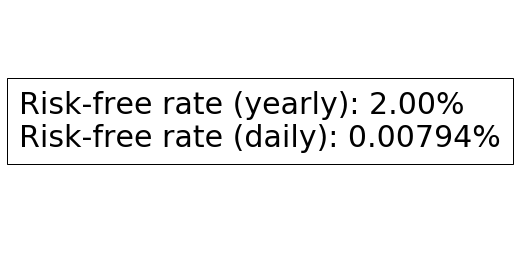

In [10]:
text=[]
text.append("Risk-free rate (yearly): {0:.2%}".format(Treasury))
text.append("Risk-free rate (daily): {0:.5%}".format(riskfree))
#text_str.append(r"$\sup|F_e-F_t|$={0:.2f}".format(maxval))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("riskfree")
plt.show()
plt.close()

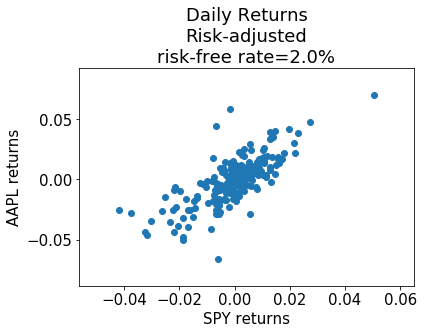

In [11]:
plt.figure()
plt.scatter(returns_ra[MARKET],returns_ra[ASSET])
plt.xlabel(MARKET+" returns")
plt.ylabel(ASSET+" returns")
plt.title("Daily Returns\nRisk-adjusted\nrisk-free rate={0:.1%}".format(Treasury))
saver("returns_scatter")
plt.show()
plt.close()

In [12]:
slope,intercept,_,_,_=scipy.stats.linregress(returns_ra[MARKET],returns_ra[ASSET])
print(slope)
print(intercept)
alpha=intercept
beta=slope

1.2578724395184495
8.997298304804104e-05


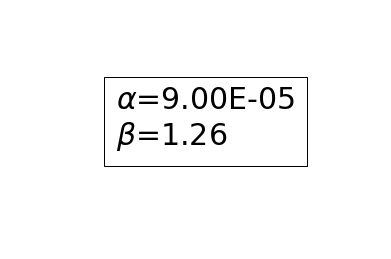

In [13]:
text=[]
text.append(r"$\alpha$={0:.2E}".format(alpha))
text.append(r"$\beta$={0:.2f}".format(beta))
#text_str.append(r"$\sup|F_e-F_t|$={0:.2f}".format(maxval))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("slopeintercept")
plt.show()
plt.close()

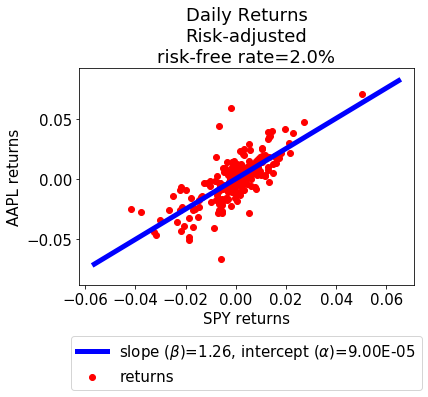

In [14]:
plt.figure()
plt.scatter(returns_ra[MARKET],returns_ra[ASSET],color="red",label="returns")
plt.xlabel(MARKET+" returns")
plt.ylabel(ASSET+" returns")
xlims=numpy.array(plt.gca().get_xlim())
linestr=r"slope ($\beta$)={0:.2f}, intercept ($\alpha$)={1:.2E}".format(slope,intercept)
plt.plot(xlims,intercept+slope*xlims,color="blue",label=linestr)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.title("Daily Returns\nRisk-adjusted\nrisk-free rate={0:.1%}".format(Treasury))
saver("bestline")
plt.show()
plt.close()

In [15]:
R=returns[ASSET]-returns[MARKET]
R.head()

Date
2018-01-02         NaN
2018-01-03   -0.006499
2018-01-04    0.000430
2018-01-05    0.004721
2018-01-08   -0.005543
dtype: float64

0.0023284001968909536


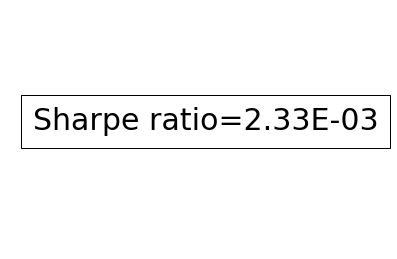

In [16]:
Sharpe=R.mean()/R.std()
print(Sharpe)
text=[]
text.append("Sharpe ratio={0:.2E}".format(Sharpe))
#text_str.append(r"$\sup|F_e-F_t|$={0:.2f}".format(maxval))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("Sharpe")
plt.show()
plt.close()

In [17]:
r_scl=alpha+(beta-1)*returns_ra[MARKET].mean()
print(r_scl)
print(R.mean())

2.8789197399703664e-05
2.8789197399704315e-05


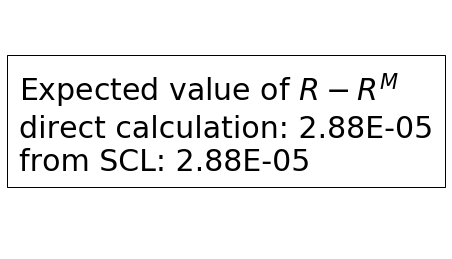

In [18]:
text=[]
text.append(r"Expected value of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.mean()))
text.append("from SCL: {0:.2E}".format(r_scl))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("mean_compare")
plt.show()
plt.close()

In [19]:
err=returns_ra[ASSET]-(alpha+beta*returns_ra[MARKET])
v_scl=(beta-1)**2*returns_ra[MARKET].var()+err.var()
print(v_scl)
print(R.var())

0.00015287760149911846
0.00015287760149911838


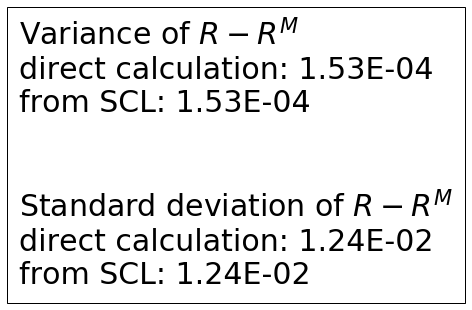

In [20]:
text=[]
text.append(r"Variance of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.var()))
text.append("from SCL: {0:.2E}".format(v_scl))
text.append("\n")
text.append(r"Standard deviation of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.std()))
text.append("from SCL: {0:.2E}".format(numpy.sqrt(v_scl)))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("var_compare")
plt.show()
plt.close()